In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\ahamm\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


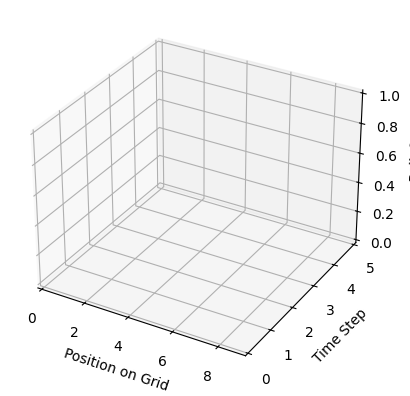

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Number of grid cells
grid_size = 10

# Initial belief: uniform distribution (no prior knowledge of the robot's position)
bel_x_t_1 = np.ones(grid_size) / grid_size

# Motion model: defines how the robot moves (with uncertainty)
def motion_model(xt, u_t, xt_1):
    if xt == (xt_1 + u_t) % grid_size:
        return 0.8  # 80% chance it moves as expected
    elif xt == xt_1:  # stays in the same position
        return 0.1
    elif xt == (xt_1 + u_t * 2) % grid_size:  # overshoots
        return 0.1
    else:
        return 0.0

# Sensor model: defines how the sensor reports the robot's position (with uncertainty)
def sensor_model(z_t, xt):
    if z_t == xt:
        return 0.8  # 80% chance sensor detects the correct position
    elif abs(z_t - xt) == 1:  # neighboring positions
        return 0.1
    else:
        return 0.0

# Bayes filter: updates the belief distribution based on control input and sensor reading
def bayes_filter(bel_x_t_1, u_t, z_t, motion_model, sensor_model):
    bel_x_t = np.zeros_like(bel_x_t_1)
    
    # Prediction step
    for xt in range(len(bel_x_t)):
        for xt_1 in range(len(bel_x_t_1)):
            bel_x_t[xt] += motion_model(xt, u_t, xt_1) * bel_x_t_1[xt_1]
    
    # Correction step
    eta = 0
    for xt in range(len(bel_x_t)):
        bel_x_t[xt] *= sensor_model(z_t, xt)
        eta += bel_x_t[xt]
    
    if eta != 0:
        bel_x_t /= eta

    return bel_x_t

# Simulated robot trajectory (control inputs and sensor readings)
control_inputs = [+1, +1, -1, +1, +1]  # Robot moves right, right, left, right, right
sensor_readings = [2, 3, 4, 3, 5]      # Noisy sensor readings

# Initial belief
bel_x_t_1 = np.ones(grid_size) / grid_size

# Store belief distribution at each time step for animation
belief_history = []

# Loop over the time steps
for t, u_t in enumerate(control_inputs):
    z_t = sensor_readings[t]  # Sensor reading at time t
    
    # Update the belief using the Bayes filter
    bel_x_t = bayes_filter(bel_x_t_1, u_t, z_t, motion_model, sensor_model)
    
    # Store belief distribution for this time step
    belief_history.append(bel_x_t.copy())
    
    # Update belief for next iteration
    bel_x_t_1 = bel_x_t

# 3D Animation Setup
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initial belief for the plot
x = np.arange(grid_size)
y = np.zeros(grid_size)
bars = ax.bar(x, y, zs=0, zdir='y', width=0.5, color='b')

ax.set_xlim(0, grid_size - 1)
ax.set_ylim(0, len(belief_history))
ax.set_zlim(0, 1)
ax.set_xlabel('Position on Grid')
ax.set_ylabel('Time Step')
ax.set_zlabel('Belief')

# Update function for animation
def update_belief(num):
    for bar, h in zip(bars, belief_history[num]):
        bar.set_height(h)
    ax.set_title(f'Time Step {num}')

# Animation
anim = FuncAnimation(fig, update_belief, frames=len(belief_history), repeat=False)

# Show the animation
plt.show()

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

sns.set_palette("Spectral")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

In [3]:
# Importing necessary modules from sklearn for dataset loading, model selection, preprocessing, and metrics
from sklearn.datasets import load_digits  # For loading the digits dataset
from sklearn.model_selection import train_test_split, KFold  # For splitting data into training and testing sets, and for cross-validation
from sklearn.preprocessing import StandardScaler  # For scaling/normalizing the data
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance

In [4]:
# Load the digits dataset from sklearn
digits = load_digits()
# Extract the data and target from the loaded dataset
X, y = digits.data, digits.target

In [5]:
# Display the shape of the input data matrix X
print("X shape:", X.shape)
# Display the shape of the target variable y
print("y shape:", y.shape)

X shape: (1797, 64)
y shape: (1797,)


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1437, 64)
X_test shape: (360, 64)
y_train shape: (1437,)
y_test shape: (360,)


In [8]:
# Normalize the data
scaler = StandardScaler()  # Initialize the StandardScaler
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)  # Transform the testing data

 **X**: Input data matrix of shape $(n_x, m)$, where:
  - $( n_x$): Number of input features.
  - $( m )$: Number of training examples.

In [9]:
# Transpose the training data to change its shape from (m, nx) to (nx, m) as required by the neural network
X_train = X_train.T
# Transpose the testing data to change its shape from (m, nx) to (nx, m) as required by the neural network
X_test = X_test.T

# Display the new shape of the transposed training data
print("X_train shape:", X_train.shape)
# Display the new shape of the transposed testing data
print("X_test shape:", X_test.shape)

X_train shape: (64, 1437)
X_test shape: (64, 360)


In [10]:
# One-hot encode the labels
def one_hot_encode(y, num_classes):
    # np.eye creates an identity matrix of shape (num_classes, num_classes)
    # This is used to create a one-hot encoding for each class
    # The [y] indexing selects the rows corresponding to the labels in y
    # The .T transposes the result to have shape (num_classes, m) where m is the number of examples
    return np.eye(num_classes)[y].T

In [11]:
y_train_one_hot = one_hot_encode(y_train, 10)
y_test_one_hot = one_hot_encode(y_test, 10)

**Y**: True label matrix of shape $(n_y, m)$, where:
  - $( n_y )$: Number of output classes (e.g., 1 for binary classification, C for multiclass).
  - $( m)$: Number of training examples.

In [12]:
print("y_train_one_hot shape:", y_train_one_hot.shape)
print("y_test_one_hot shape:", y_test_one_hot.shape)

y_train_one_hot shape: (10, 1437)
y_test_one_hot shape: (10, 360)


- **Input layer**: $X_{\text{train}}$  has shape \($64, 1437$) \, meaning our input have 64 features and 1437 training examples.

- **Output layer**: \( $y_{\text{train\_one\_hot}}$ \) has shape  ($10, 1437$) , so our network's output should have 10 units, corresponding to the 10 classes in one-hot encoding.

We'll design the network with three hidden layers, with the number of units you prefer for each layer:

### Network Design:

1. **Input Layer**: 64 units $from ( X_{\text{train}})$.

2. **Hidden Layer 1**: 128 units, ReLU activation.

3. **Hidden Layer 2**: 64 units, ReLU activation.

4. **Hidden Layer 3**: 32 units, ReLU activation.

5. **Output Layer**: 10 units, softmax activation (to match the 10 classes).

### Forward Propagation:

1. $Z^{[1]} = W^{[1]} X + b^{[1]}$ 

2. $A^{[1]} = g_{\text{ReLU}}(Z^{[1]})$ 

3.  $Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$

4. $A^{[2]} = g_{\text{ReLU}}(Z^{[2]})$

5. $Z^{[3]} = W^{[3]} A^{[2]} + b^{[3]}$

6. $A^{[3]} = g_{\text{ReLU}}(Z^{[3]})$

7. $Z^{[4]} = W^{[4]} A^{[3]} + b^{[4]}$

8. $A^{[4]} = g_{\text{softmax}}(Z^{[4]})$

### Backward Propagation:

1.  $dZ^{[4]} = A^{[4]} - Y$ 

2.  $dW^{[4]} = \frac{1}{m} dZ^{[4]} A^{[3]T}$

3.  $db^{[4]} = \frac{1}{m} \sum dZ^{[4]}$

###  Entering Hidden Layers

4. $dZ^{[3]} = W^{[4]T} dZ^{[4]} \cdot g'_{\text{ReLU}}(Z^{[3]})$ 

5. $dW^{[3]} = \frac{1}{m} dZ^{[3]} A^{[2]T}$

6. $db^{[3]} = \frac{1}{m} \sum dZ^{[3]}$

7. $dZ^{[2]} = W^{[3]T} dZ^{[3]} \cdot g'_{\text{ReLU}}(Z^{[2]})$

8. $dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$

9. $db^{[2]} = \frac{1}{m} \sum dZ^{[2]}$

10. $dZ^{[1]} = W^{[2]T} dZ^{[2]} \cdot g'_{\text{ReLU}}(Z^{[1]})$

11. $dW^{[1]} = \frac{1}{m} dZ^{[1]} X^T$

12.  $db^{[1]} = \frac{1}{m} \sum dZ^{[1]}$

  

### Parameter Updates:

1. $W^{[4]} := W^{[4]} - \alpha dW^{[4]}$

2. $b^{[4]} := b^{[4]} - \alpha db^{[4]}$ 

3. $W^{[3]} := W^{[3]} - \alpha dW^{[3]}$

4. $b^{[3]} := b^{[3]} - \alpha db^{[3]}$ 

5. $W^{[2]} := W^{[2]} - \alpha dW^{[2]}$

6.  $b^{[2]} := b^{[2]} - \alpha db^{[2]}$

7. $W^{[1]} := W^{[1]} - \alpha dW^{[1]}$

8. $b^{[1]} := b^{[1]} - \alpha db^{[1]}$

### Variable Shapes:

- $A^{[0]}$ = X : \( $64 \times m$ \)

-  $Z^{[1]} \sim A^{[1]}$ : \( $128 \times m$ \)

-  $W^{[1]}$ : \( $128 \times 64$ \)

- $b^{[1]}$: \( $128 \times 1$ \)

- $Z^{[2]} \sim A^{[2]}$ : \( $64 \times m$ \)

- $\ W^{[2]}$ \: \( $64 \times 128$ \)

- $b^{[2]}$ \: \( $64 \times 1$ \)

- $Z^{[3]} \sim A^{[3]}$ : \( $32 \times m$ \)

- $W^{[3]}$: \( $32 \times 64$ \)

-  $b^{[3]}$: \( $32 \times 1$ \)

- $Z^{[4]} \sim A^{[4]}$: \( $10 \times m$ \)

- $W^{[4]}$: \( $10 \times 32$ \)

- $b^{[4]}$ : \( $10 \times 1$ \)

In [13]:
def initialize_parameters():
    np.random.seed(1)  # For reproducibility, ensuring the same random numbers are generated each time

    parameters = {}  # Initialize an empty dictionary to store the parameters

    # Layer 1 (Input to Hidden Layer 1)
    parameters['W1'] = np.random.randn(128, 64) * np.sqrt(2 / 64)  # Weight matrix for layer 1, using Xavier initialization for weights
    parameters['b1'] = np.zeros((128, 1))  # Bias vector for layer 1, initialized as zeros

    # Layer 2 (Hidden Layer 1 to Hidden Layer 2)
    parameters['W2'] = np.random.randn(64, 128) * np.sqrt(2 / 128)  # Weight matrix for layer 2, using Xavier initialization for weights
    parameters['b2'] = np.zeros((64, 1))  # Bias vector for layer 2, initialized as zeros

    # Layer 3 (Hidden Layer 2 to Hidden Layer 3)
    parameters['W3'] = np.random.randn(32, 64) * np.sqrt(2 / 64)  # Weight matrix for layer 3, using Xavier initialization for weights
    parameters['b3'] = np.zeros((32, 1))  # Bias vector for layer 3, initialized as zeros

    # Output Layer (Hidden Layer 3 to Output)
    parameters['W4'] = np.random.randn(10, 32) * np.sqrt(2 / 32)  # Weight matrix for output layer, using Xavier initialization for weights
    parameters['b4'] = np.zeros((10, 1))  # Bias vector for output layer, initialized as zeros

    return parameters

In [14]:
def RELu(Z):
    # np.maximum returns an element-wise maximum of array elements.
    # Here, it ensures that all negative values in Z are set to 0, while non-negative values remain unchanged.
    return np.maximum(0, Z)

In [15]:
def softmax(Z):
    # Subtract the maximum value from Z to prevent overflow and ensure numerical stability
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    # Normalize the exponentiated values by dividing by their sum to ensure probabilities sum to 1
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

In [16]:
def forward_propagation(X, parameters):
    # Retrieve parameters for each layer
    W1, b1 = parameters['W1'], parameters['b1']  # Layer 1 parameters
    W2, b2 = parameters['W2'], parameters['b2']  # Layer 2 parameters
    W3, b3 = parameters['W3'], parameters['b3']  # Layer 3 parameters
    W4, b4 = parameters['W4'], parameters['b4']  # Layer 4 parameters

    # Forward propagation: Layer 1 (Input -> Hidden Layer 1)
    Z1 = np.dot(W1, X) + b1  # Compute the linear component of Layer 1
    A1 = RELu(Z1)  # Apply ReLU activation function to Z1

    # Forward propagation: Layer 2 (Hidden Layer 1 -> Hidden Layer 2)
    Z2 = np.dot(W2, A1) + b2  # Compute the linear component of Layer 2
    A2 = RELu(Z2)  # Apply ReLU activation function to Z2

    # Forward propagation: Layer 3 (Hidden Layer 2 -> Hidden Layer 3)
    Z3 = np.dot(W3, A2) + b3  # Compute the linear component of Layer 3
    A3 = RELu(Z3)  # Apply ReLU activation function to Z3

    # Forward propagation: Layer 4 (Hidden Layer 3 -> Output Layer)
    Z4 = np.dot(W4, A3) + b4  # Compute the linear component of Layer 4
    A4 = softmax(Z4)  # Apply softmax activation function to Z4 for output layer

    # Store all activations and Z values for backpropagation
    cache = {
        "Z1": Z1, "A1": A1,  # Store Z and A for Layer 1
        "Z2": Z2, "A2": A2,  # Store Z and A for Layer 2
        "Z3": Z3, "A3": A3,  # Store Z and A for Layer 3
        "Z4": Z4, "A4": A4   # Store Z and A for Layer 4
    }
    
    return A4, cache

In [17]:
def relu_derivative(Z):
    # Returns 1 where Z > 0, otherwise 0
    return Z > 0

def backpropagation(X, Y, cache, parameters):
    m = X.shape[1]  # Number of examples

    # Retrieve cached values
    A1, A2, A3, A4 = cache['A1'], cache['A2'], cache['A3'], cache['A4']
    Z1, Z2, Z3, Z4 = cache['Z1'], cache['Z2'], cache['Z3'], cache['Z4']

    # Retrieve parameters
    W2, W3, W4 = parameters['W2'], parameters['W3'], parameters['W4']

    # Backpropagation: Output Layer
    dZ4 = A4 - Y  # dZ^{[4]} = A^{[4]} - Y
    dW4 = (1 / m) * np.dot(dZ4, A3.T)  # dW^{[4]} = (1/m) * dZ^{[4]} * A^{[3]T}
    db4 = (1 / m) * np.sum(dZ4, axis=1, keepdims=True)  # db^{[4]} = (1/m) * sum(dZ^{[4]}, axis=1)

    # Backpropagation: Layer 3 (Hidden Layer 3 -> Hidden Layer 2)
    dZ3 = np.dot(W4.T, dZ4) * relu_derivative(Z3)  # dZ^{[3]} = W^{[4]T} * dZ^{[4]} * g'(Z^{[3]})
    dW3 = (1 / m) * np.dot(dZ3, A2.T)  # dW^{[3]} = (1/m) * dZ^{[3]} * A^{[2]T}
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)  # db^{[3]} = (1/m) * sum(dZ^{[3]}, axis=1)

    # Backpropagation: Layer 2 (Hidden Layer 2 -> Hidden Layer 1)
    dZ2 = np.dot(W3.T, dZ3) * relu_derivative(Z2)  # dZ^{[2]} = W^{[3]T} * dZ^{[3]} * g'(Z^{[2]})
    dW2 = (1 / m) * np.dot(dZ2, A1.T)  # dW^{[2]} = (1/m) * dZ^{[2]} * A^{[1]T}
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)  # db^{[2]} = (1/m) * sum(dZ^{[2]}, axis=1)

    # Backpropagation: Layer 1 (Hidden Layer 1 -> Input Layer)
    dZ1 = np.dot(W2.T, dZ2) * relu_derivative(Z1)  # dZ^{[1]} = W^{[2]T} * dZ^{[2]} * g'(Z^{[1]})
    dW1 = (1 / m) * np.dot(dZ1, X.T)  # dW^{[1]} = (1/m) * dZ^{[1]} * X^T
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)  # db^{[1]} = (1/m) * sum(dZ^{[1]}, axis=1)

    # Store gradients in a dictionary
    gradients = {
        'dW1': dW1, 'db1': db1,
        'dW2': dW2, 'db2': db2,
        'dW3': dW3, 'db3': db3,
        'dW4': dW4, 'db4': db4
    }

    return gradients

In [18]:
def update_parameters(parameters, gradients, learning_rate):
    # Update parameters for all layers
    # Layer 1
    parameters['W1'] = parameters['W1'] - learning_rate * gradients['dW1']  # Update weights for layer 1
    parameters['b1'] = parameters['b1'] - learning_rate * gradients['db1']  # Update bias for layer 1

    # Layer 2
    parameters['W2'] = parameters['W2'] - learning_rate * gradients['dW2']  # Update weights for layer 2
    parameters['b2'] = parameters['b2'] - learning_rate * gradients['db2']  # Update bias for layer 2

    # Layer 3
    parameters['W3'] = parameters['W3'] - learning_rate * gradients['dW3']  # Update weights for layer 3
    parameters['b3'] = parameters['b3'] - learning_rate * gradients['db3']  # Update bias for layer 3

    # Layer 4
    parameters['W4'] = parameters['W4'] - learning_rate * gradients['dW4']  # Update weights for layer 4
    parameters['b4'] = parameters['b4'] - learning_rate * gradients['db4']  # Update bias for layer 4

    return parameters

In [19]:
def compute_cost(A4, Y):
    # Calculate the number of training examples
    m = Y.shape[1]
    # Define a small value to avoid division by zero
    epsilon = 1e-15
    # Clip the values of A4 to ensure they are not too close to 0 or 1
    A4 = np.clip(A4, epsilon, 1 - epsilon)
    # Calculate the cost using the formula for binary cross-entropy loss
    cost = -np.sum(Y * np.log(A4)) / m
    return cost

In [20]:
def train_neural_network(X_train, Y_train, parameters, learning_rate=0.01, num_iterations=1000, print_cost=False):
    costs = []  # Initialize a list to keep track of the cost at each epoch

    for i in range(num_iterations):
        # 1. Forward Propagation: Compute the output of the neural network
        A4, cache = forward_propagation(X_train, parameters)
        
        # 2. Compute the cost: Calculate the difference between the predicted output and the actual output
        cost = compute_cost(A4, Y_train)
        
        # 3. Backward Propagation: Compute the gradients of the cost with respect to the parameters
        gradients = backpropagation(X_train, Y_train, cache, parameters)
        
        # 4. Update Parameters: Adjust the parameters to minimize the cost
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        # 5. Store and print the cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)  # Store the cost at this iteration
            if print_cost:
                print(f"Cost after iteration {i}: {cost}")  # Print the cost if print_cost is True

    return costs

In [21]:
def predict(X, parameters):
    # Forward propagate the input X through the network to get the output
    AL, _ = forward_propagation(X, parameters)
    # Return the index of the maximum value along the 0th axis, which corresponds to the predicted class
    return np.argmax(AL, axis=0)

Cost after iteration 0: 3.587006265007091


Cost after iteration 100: 0.08528232221674362
Cost after iteration 200: 0.03164440909881338
Cost after iteration 300: 0.016650407268010203
Cost after iteration 400: 0.010406506005273255
Cost after iteration 500: 0.0071909013288437235
Cost after iteration 600: 0.005377799593959244
Cost after iteration 700: 0.004233206978468673
Cost after iteration 800: 0.003454485330834566
Cost after iteration 900: 0.0028936369064050866
Cost after iteration 1000: 0.002474251608162398
Cost after iteration 1100: 0.00215227449463164
Cost after iteration 1200: 0.0018985899744283002
Cost after iteration 1300: 0.0016938856645185012
Cost after iteration 1400: 0.0015256329435970695
Cost after iteration 1500: 0.001385109619993957
Cost after iteration 1600: 0.001266038004914456
Cost after iteration 1700: 0.0011640461562080148
Cost after iteration 1800: 0.00107582157159437
Cost after iteration 1900: 0.0009990207344764503
Cost after iteration 2000: 0.0009315560242434714
Cost after iteration 2100: 0.0008718544949163

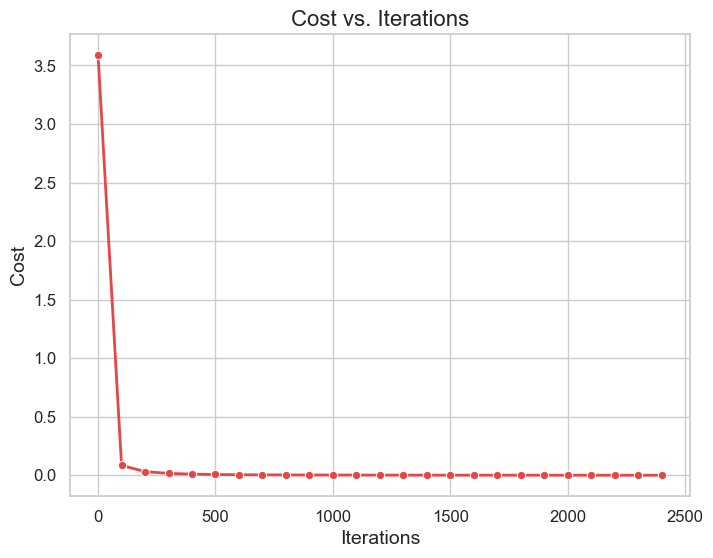

In [22]:
# Initialize the parameters for the neural network
parameters = initialize_parameters()

# Train the neural network with the specified parameters and hyperparameters
cost = train_neural_network(X_train, y_train_one_hot, parameters, learning_rate=0.1, num_iterations=2500, print_cost=True)

# Use the trained parameters to make predictions on the test set
test_predictions = predict(X_test, parameters)

# Calculate the accuracy of the predictions
test_accuracy = accuracy_score(np.argmax(y_test_one_hot, axis=0), test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")  # Print the test accuracy

# Generate and print the classification report for the predictions
print("\nClassification Report:")
print(classification_report(np.argmax(y_test_one_hot, axis=0), test_predictions))

# Plot the cost over iterations to visualize the training process
plt.figure(figsize=(8, 6))  # Set the figure size
sns.lineplot(x=range(0, 2500, 100), y=cost, marker='o', color='#e74645', linewidth=2)  # Plot the cost
plt.title('Cost vs. Iterations')  # Set the title
plt.xlabel('Iterations')  # Set the x-axis label
plt.ylabel('Cost')  # Set the y-axis label
plt.show()  # Show the plot